Micro-Credit Defaulter 

Model Problem Statement : 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations.

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

In [54]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving Data_Description.xlsx to Data_Description (2).xlsx


In [55]:
import io
des = pd.read_excel(io.BytesIO(data_to_load['Data_Description.xlsx']))
print("COLUMNS AND INFORMATIONS")
des



COLUMNS AND INFORMATIONS


Unnamed: 0  label      msisdn  aon  daily_decr30  daily_decr90  rental30  \
0           1      1  4022154989  155   2111.000000       3018.71      0.00   
1           2      1  8984212438  137  18017.682000      18052.41    629.92   
2           3      0  6356838509  122   5662.625333       5672.28    467.24   
3           4      1  1169470878  144   4288.500000       4313.48   4647.51   
4           5      1  1292895185   94   1618.800000       1634.75   1096.49   
5           6      1  6128973512  124   9425.000000      16805.83    696.92   

   rental90  last_rech_date_ma  last_rech_date_da  ...  maxamnt_loans30  \
0    267.60                 50                NaN  ...               12   
1    749.92                 13                NaN  ...               12   
2    518.46                  2                NaN  ...                6   
3   4765.11                 23                NaN  ...                6   
4   1059.71                  1                NaN  ...                6   
5   1909.19                  1                NaN  ...                6   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 2.0            1            12               12   
1                 0.0            4            30               12   
2                 0.0            3            18                6   
3                 0.5            2            12                6   
4                 0.5            2            12                6   
5                 0.0            5            30                6   

   medianamnt_loans90  payback30  payback90  pcircle       pdate  
0                 2.0        NaN        NaN      UPW  2016-08-12  
1                 0.0        4.0        3.0      UPW  2016-07-24  
2                 0.0       13.0       13.0      UPW  2016-07-13  
3                 0.5        NaN        NaN      UPW  2016-07-30  
4                 0.5        NaN        NaN      UPW  2016-07-06  
5                 0.0        4.0        4.0      UPW  2016-08-14  

[6 rows x 37 columns]


Data information informations

1.There are no null values in the dataset.

2.There may be some customers with no loan history.

3.The dataset is imbalanced. 

4.Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

5.For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.

6.You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.

Lets Start our analysis in importing the required libraries.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving Data file.csv to Data file.csv



**importing the Data**




In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Data file.csv']))
df 

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:

df = pd.read_csv("Data file.csv", index_col=0, parse_dates=['pdate'])
df


label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
1           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
2           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
3           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
4           1  55773I70781   241.0     21.228000     21.228000    159.42   
5           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209589      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209590      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209591      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209592      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209593      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
1         260.13                2.0                0.0              1539  ...   
2        3691.26               20.0                0.0              5787  ...   
3         900.13                3.0                0.0              1539  ...   
4         159.42               41.0                0.0               947  ...   
5        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209589   1089.19                1.0                0.0              4048  ...   
209590   1728.36                4.0                0.0               773  ...   
209591   8893.20                3.0                0.0              1539  ...   
209592    984.58                2.0               38.0               773  ...   
209593    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1                   6.0                 0.0          2.0            12   
2                  12.0                 0.0          1.0            12   
3                   6.0                 0.0          1.0             6   
4                   6.0                 0.0          2.0            12   
5                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209589              6.0                 0.0          2.0            12   
209590              6.0                 0.0          3.0            18   
209591             12.0                 0.0          6.0            54   
209592             12.0                 0.0          3.0            24   
209593             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1                     6                 0.0  29.000000  29.000000      UPW   
2                    12                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   0.000000   0.000000      UPW   
5                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209589                6                 0.0   1.000000   1.000000      UPW   
209590                6                 0.0   1.000000   1.000000      UPW   
209591               12                 0.0   4.000000   3.833333      UPW   
209592               12                 0.0   0.000000  10.500000      UPW   
209593               12                 0.0   0.000000   0.000000      UPW   

            pdate  
1      2016-07-20  
2      2016-08-10  
3      2016-08-19  
4      2016-06-06  
5      2016-06-22  
...           ...  
209589 2016-06-17  
209590 2016-06-12  
209591 2016-07-29  
209592 2016-07-25  
209593 2016-07-07  

[209593 rows x 36 columns]

EDA:

Removing the unwanted data


In [ ]:
df.duplicated().sum()


1

In [ ]:
df= df.drop_duplicates()


In [ ]:
df.pcircle.unique(), df.msisdn.value_counts()


(array(['UPW'], dtype=object), 04581I85330    7
 47819I90840    7
 43430I70786    6
 55809I89238    6
 67324I84453    6
               ..
 28720I90840    1
 36902I90840    1
 17447I88689    1
 59686I90584    1
 65061I85339    1
 Name: msisdn, Length: 186243, dtype: int64)

In [ ]:
df.drop(["msisdn","pcircle"], axis =1, inplace = True)


In [ ]:
df.pdate.unique()


array(['2016-07-20T00:00:00.000000000', '2016-08-10T00:00:00.000000000',
       '2016-08-19T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
       '2016-06-22T00:00:00.000000000', '2016-07-02T00:00:00.000000000',
       '2016-07-05T00:00:00.000000000', '2016-08-05T00:00:00.000000000',
       '2016-06-15T00:00:00.000000000', '2016-06-08T00:00:00.000000000',
       '2016-06-12T00:00:00.000000000', '2016-06-20T00:00:00.000000000',
       '2016-06-29T00:00:00.000000000', '2016-06-16T00:00:00.000000000',
       '2016-08-03T00:00:00.000000000', '2016-06-24T00:00:00.000000000',
       '2016-07-04T00:00:00.000000000', '2016-07-03T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-08T00:00:00.000000000',
       '2016-06-26T00:00:00.000000000', '2016-06-23T00:00:00.000000000',
       '2016-07-06T00:00:00.000000000', '2016-07-09T00:00:00.000000000',
       '2016-06-10T00:00:00.000000000', '2016-06-07T00:00:00.000000000',
       '2016-06-27T00:00:00.000000000', '2016-08-11

We can observe that data is taken from year 2016 and mostly of 06, 07, 08 months lets split our date data.



In [ ]:
day = df.pdate.dt.day.to_frame()
month = df.pdate.dt.month.to_frame()

date= day.join(month, how='right', lsuffix='_day', rsuffix="_month")
df = df.join(date, how= "left")
df.drop("pdate", inplace = True, axis = 1)
df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
1           0   272.0   3055.050000   3065.150000    220.13    260.13   
2           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
3           1   535.0   1398.000000   1398.000000    900.13    900.13   
4           1   241.0     21.228000     21.228000    159.42    159.42   
5           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209589      1   404.0    151.872333    151.872333   1089.19   1089.19   
209590      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209591      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209592      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209593      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1                     2.0                0.0              1539              2   
2                    20.0                0.0              5787              1   
3                     3.0                0.0              1539              1   
4                    41.0                0.0               947              0   
5                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209589                1.0                0.0              4048              3   
209590                4.0                0.0               773              4   
209591                3.0                0.0              1539              5   
209592                2.0               38.0               773              5   
209593               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1       ...              6.0                 0.0          2.0            12   
2       ...             12.0                 0.0          1.0            12   
3       ...              6.0                 0.0          1.0             6   
4       ...              6.0                 0.0          2.0            12   
5       ...              6.0                 0.0          7.0            42   
...     ...              ...                 ...          ...           ...   
209589  ...              6.0                 0.0          2.0            12   
209590  ...              6.0                 0.0          3.0            18   
209591  ...             12.0                 0.0          6.0            54   
209592  ...             12.0                 0.0          3.0            24   
209593  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pdate_day  \
1                     6                 0.0  29.000000  29.000000         20   
2                    12                 0.0   0.000000   0.000000         10   
3                     6                 0.0   0.000000   0.000000         19   
4                     6                 0.0   0.000000   0.000000          6   
5                     6                 0.0   2.333333   2.333333         22   
...                 ...                 ...        ...        ...        ...   
209589                6                 0.0   1.000000   1.000000         17   
209590                6                 0.0   1.000000   1.000000         12   
209591               12                 0.0   4.000000   3.833333         29   
209592               12                 0.0   0.000000  10.500000         25   
209593               12                 0.0   0.000000   0.000000          7   

        pdate_month  
1                 7  
2                 8  
3                 8  
4                 6  
5                 6  
...             ...  
209589            6  
209590            6  
209591            7  
209592            7  
209593

Lets see the mathematical summary of our dataset.



In [ ]:
df.describe().T


count          mean           std           min  \
label                 209592.0      0.875177      0.330519      0.000000   
aon                   209592.0   8112.380399  75696.261220    -48.000000   
daily_decr30          209592.0   5381.412999   9220.644093    -93.012667   
daily_decr90          209592.0   6082.529123  10918.836919    -93.012667   
rental30              209592.0   2692.578912   4308.596841 -23737.140000   
rental90              209592.0   3483.407309   5770.475034 -24720.580000   
last_rech_date_ma     209592.0   3755.865715  53906.020204    -29.000000   
last_rech_date_da     209592.0   3712.220632  53374.960145    -29.000000   
last_rech_amt_ma      209592.0   2064.458973   2370.790003      0.000000   
cnt_ma_rech30         209592.0      3.978053      4.256099      0.000000   
fr_ma_rech30          209592.0   3737.372947  53643.752523      0.000000   
sumamnt_ma_rech30     209592.0   7704.496570  10139.645685      0.000000   
medianamnt_ma_rech30  209592.0   1812.819258   2070.869474      0.000000   
medianmarechprebal30  209592.0   3851.945862  54006.502647   -200.000000   
cnt_ma_rech90         209592.0      6.315437      7.193487      0.000000   
fr_ma_rech90          209592.0      7.716812     12.590273      0.000000   
sumamnt_ma_rech90     209592.0  12396.236149  16857.832129      0.000000   
medianamnt_ma_rech90  209592.0   1864.597375   2081.685508      0.000000   
medianmarechprebal90  209592.0     92.025522    369.216539   -200.000000   
cnt_da_rech30         209592.0    262.579362   4183.907920      0.000000   
fr_da_rech30          209592.0   3749.512336  53885.542905      0.000000   
cnt_da_rech90         209592.0      0.041495      0.397557      0.000000   
fr_da_rech90          209592.0      0.045713      0.951388      0.000000   
cnt_loans30           209592.0      2.758975      2.554507      0.000000   
amnt_loans30          209592.0     17.951992     17.379778      0.000000   
maxamnt_loans30       209592.0    274.660029   4245.274734      0.000000   
medianamnt_loans30    209592.0      0.054029      0.218039      0.000000   
cnt_loans90           209592.0     18.520988    224.797957      0.000000   
amnt_loans90          209592.0     23.645397     26.469924      0.000000   
maxamnt_loans90       209592.0      6.703138      2.103869      0.000000   
medianamnt_loans90    209592.0      0.046078      0.200692      0.000000   
payback30             209592.0      3.398639      8.813330      0.000000   
payback90             209592.0      4.321302     10.307791      0.000000   
pdate_day             209592.0     14.398899      8.438899      1.000000   
pdate_month           209592.0      6.797321      0.741437      6.000000   

                              25%          50%         75%            max  
label                    1.000000     1.000000      1.0000       1.000000  
aon                    246.000000   527.000000    982.0000  999860.755168  
daily_decr30            42.439500  1469.091833   7244.0960  265926.000000  
daily_decr90            42.691917  1500.000000   7802.7950  320630.000000  
rental30               280.417500  1083.540000   3356.9450  198926.110000  
rental90               300.260000  1334.000000   4201.7925  200148.110000  
last_rech_date_ma        1.000000     3.000000      7.0000  998650.377733  
last_rech_date_da        0.000000     0.000000      0.0000  999171.809410  
last_rech_amt_ma       770.000000  1539.000000   2309.0000   55000.000000  
cnt_ma_rech30            1.000000     3.000000      5.0000     203.000000  
fr_ma_rech30             0.000000     2.000000      6.0000  999606.368132  
sumamnt_ma_rech30     1540.000000  4628.000000  10010.0000  810096.000000  
medianamnt_ma_rech30   770.000000  1539.000000   1924.0000   55000.000000  
medianmarechprebal30    11.000000    33.900000     83.0000  999479.419319  
cnt_ma_rech90            2.000000     4.000000      8.0000     336.000000  
fr_ma_rech90             0.000000     2.000000      8.0000      88.00000

Key observations:
1. From the above data it is clear that the data has no null values as mentioned in the Data_Description
2. Catogorical Columns:
    1. label
3. Continous Data Columns:
    1. Remaining all 31 Columns are continous data,
    2. There is large difference between 75% percentile and max Values which is it has more outliers.
    3. Mean is greater than median which also means data have outliers present lets visualize them and lty to figureout a way to remove outliers and skewness in th data.


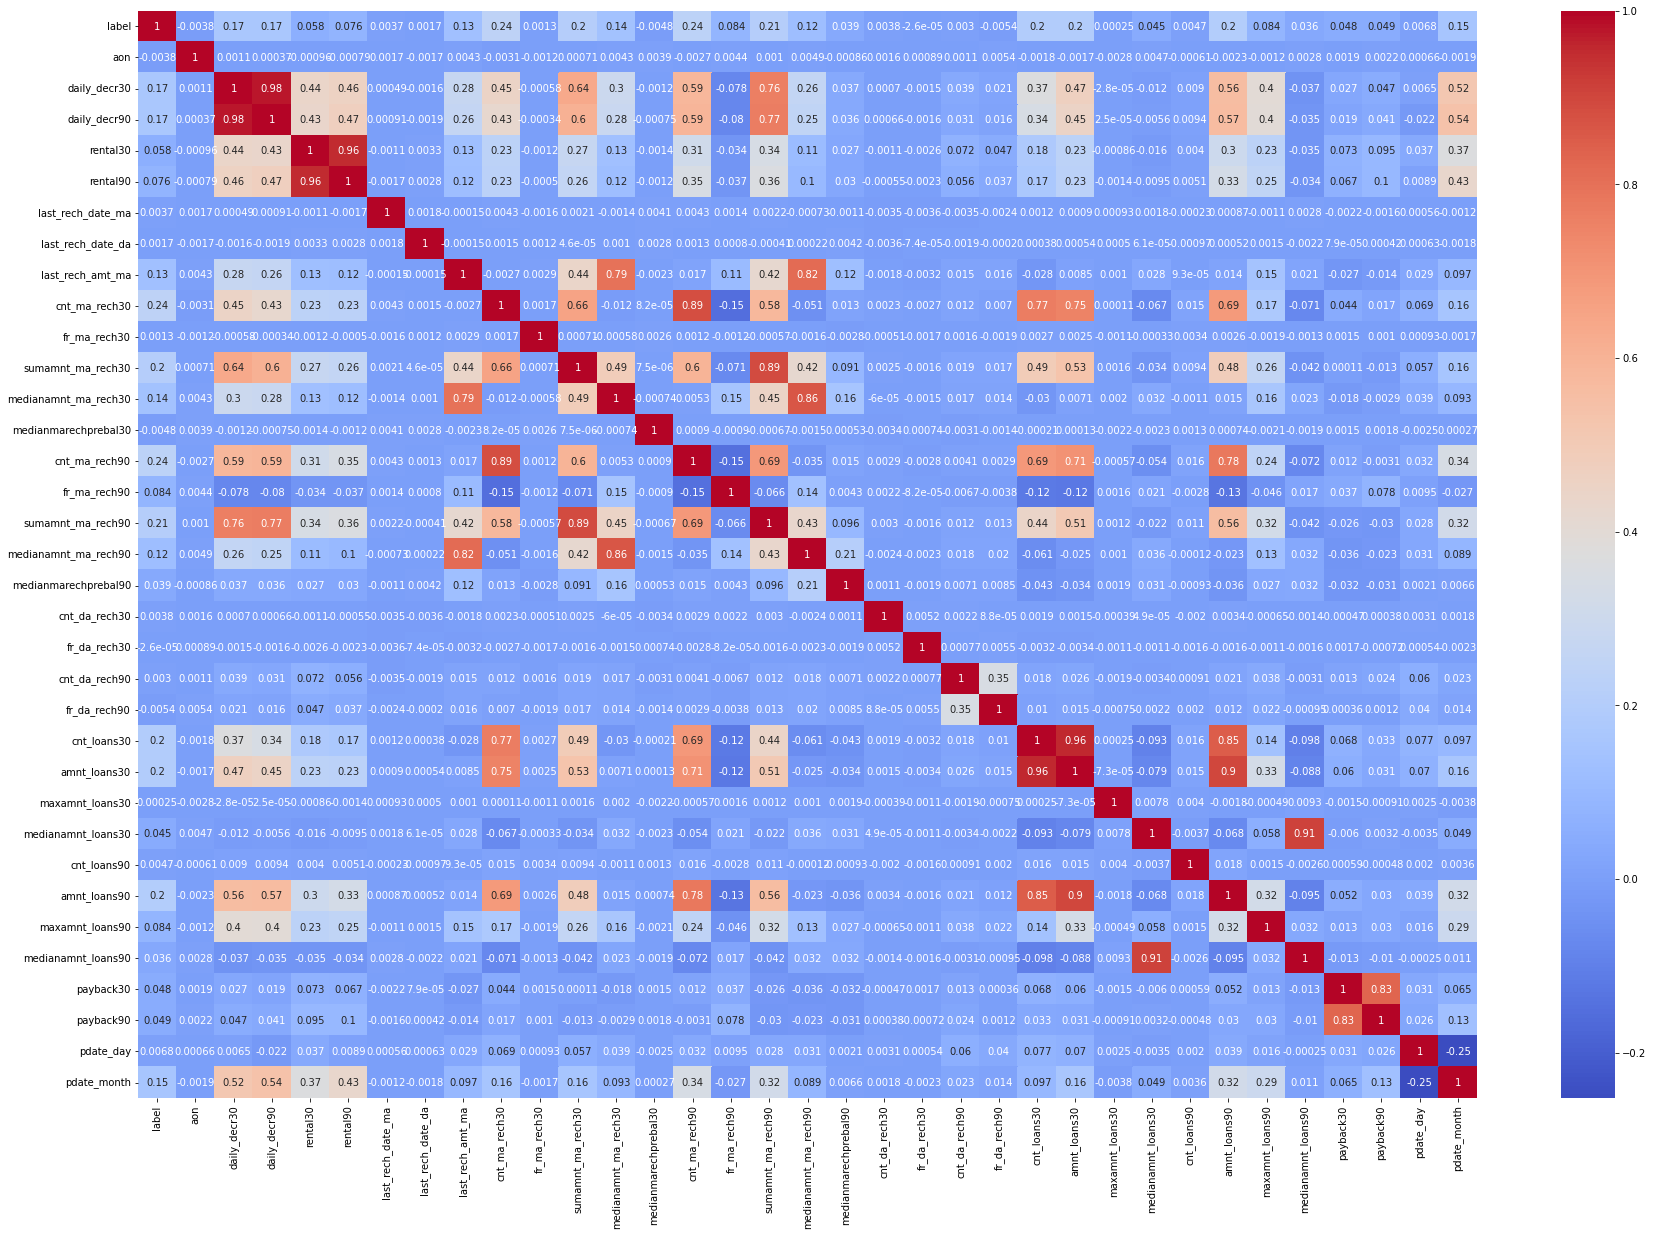

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot = True, cmap= "coolwarm")
plt.show()

Key Observations:

1.From above we can observe that "cnt_ma_rech30", "cnt_ma_rech90", "sumamnt_ma_rech90", "sumamnt_ma_rech30" have more corelation with the Target variable "label". Lets visualize the feature variable correlation with target variable seprately.

2.'daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_amt_ma','cnt_ma_rech30','sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', payback30, payback90, pdate_day, pdate_month have more correlation with each other which is these variables are dependent on each other.


In [ ]:
plt.figure(figsize=(15,7))
df.corr()["label"].sort_values(ascending=False).drop(["label"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(df.corr()["label"].sort_values(ascending=False)).drop(["label"])
print("KEY OBSERVATIONS:\n ")
cor

KEY OBSERVATIONS:
 


label
cnt_ma_rech30         0.237331
cnt_ma_rech90         0.236393
sumamnt_ma_rech90     0.205794
sumamnt_ma_rech30     0.202828
amnt_loans90          0.199788
amnt_loans30          0.197272
cnt_loans30           0.196283
daily_decr30          0.168298
daily_decr90          0.166151
pdate_month           0.154948
medianamnt_ma_rech30  0.141491
last_rech_amt_ma      0.131805
medianamnt_ma_rech90  0.120855
fr_ma_rech90          0.084386
maxamnt_loans90       0.084144
rental90              0.075521
rental30              0.058084
payback90             0.049178
payback30             0.048330
medianamnt_loans30    0.044590
medianmarechprebal90  0.039300
medianamnt_loans90    0.035747
pdate_day             0.006824
cnt_loans90           0.004733
cnt_da_rech30         0.003827
last_rech_date_ma     0.003728
cnt_da_rech90         0.002999
last_rech_date_da     0.001711
fr_ma_rech30          0.001330
maxamnt_loans30       0.000248
fr_da_rech30         -0.000026
aon                  -0.003785
medianmarechprebal30 -0.004829
fr_da_rech90         -0.005418

Lets analysis and get some data insights.

Univariate Analysis:


In [ ]:
collist = df.columns.values
collist = np.delete(collist, [0, 33, 34])
collist


array(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90'], dtype=object)

In [ ]:
plt.figure(figsize=(20,20))

for i in range(0,len(collist)):
    plt.subplot(8,4,i+1)
    df[collist[i]].hist()
    mean = np.mean(df[collist[i]])
    plt.axvline(mean, linewidth = 4, color = 'red', label = df[collist[i]])
    plt.title(f"{[collist[i]]}")
    plt.ylabel('Count')
    plt.tight_layout()

From Above we can see that

1.The most of our columns are extremely right skewed.

2.maxamnt_loans90 have only three values 6, 12, 0 and 6 is in the most of the record.

3.For fr_ma_rech90 the frequency of recharge in last 90 days the frequency is very lesser i.e. most of the people are recharging in very lesser time.

4.aon age on cellular network in days most of the people are actually lesser in age on cellular network.

5.rental90, rental90, average main balance over last 90, 30 days are mostly between 0 - 1500.

Lets also analyse the relationship of every feature variable with the Target variable "label"

Multivariate Analysis.


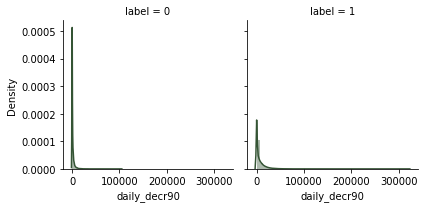

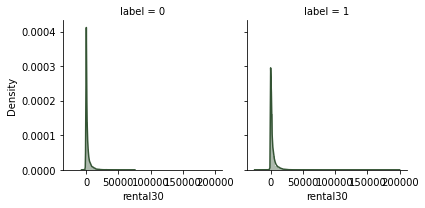

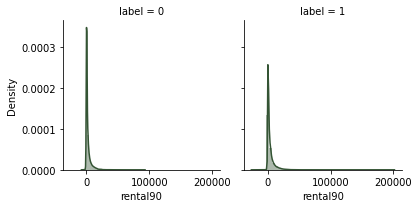

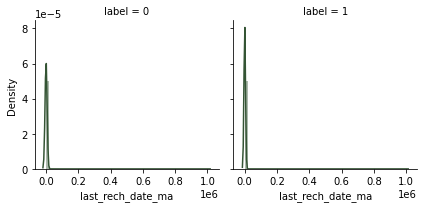

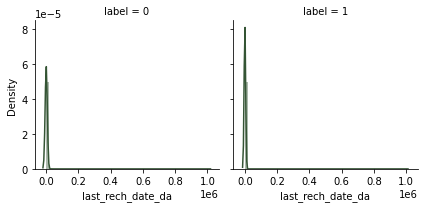

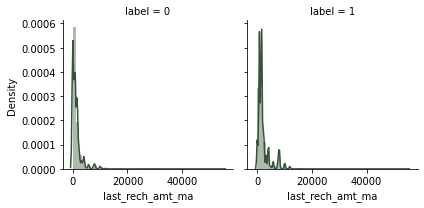

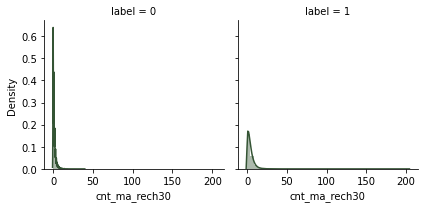

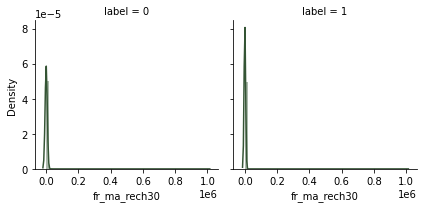

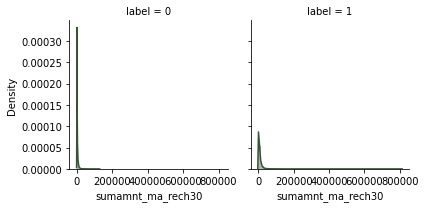

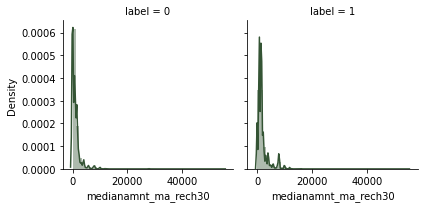

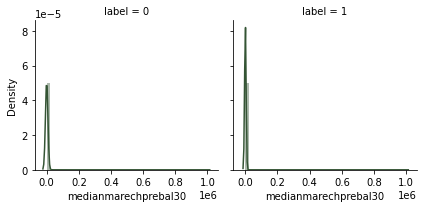

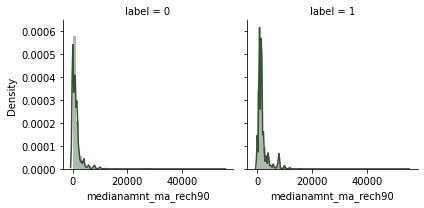

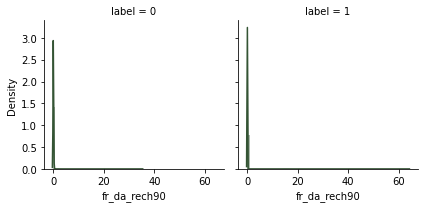

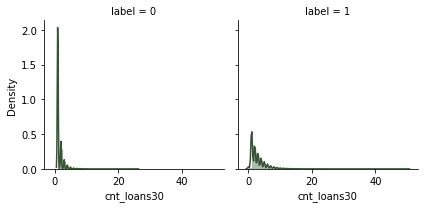

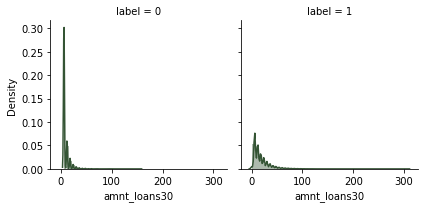

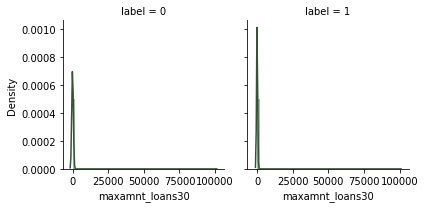

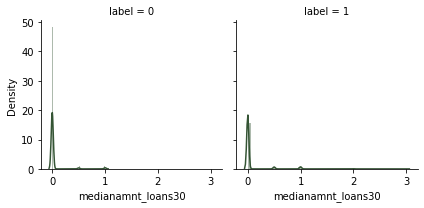

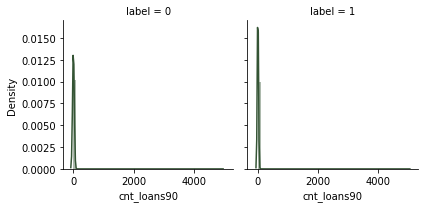

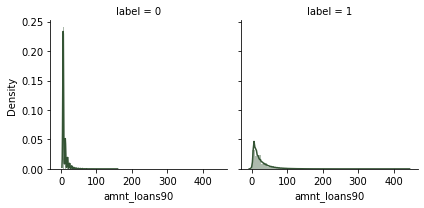

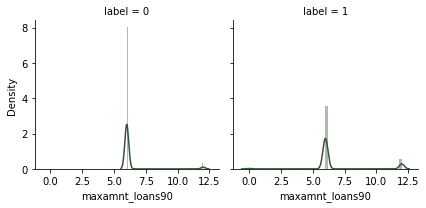

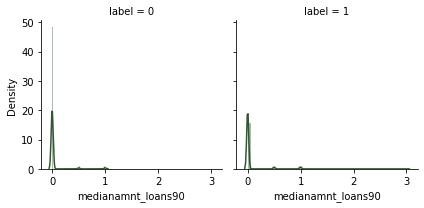

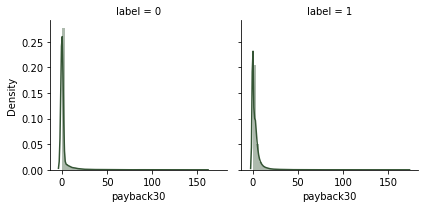

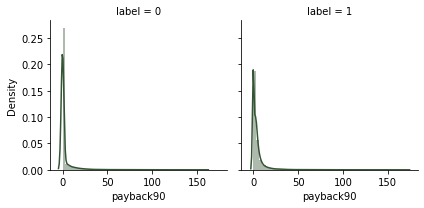

In [ ]:
for i in collist:
    facet= sns.FacetGrid(df,col="label")
    facet.map(sns.distplot,i,color = "#345434")
    plt.show()


Key insights:

1.As like said above Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

2.daily_dec30, daily_dec90, rental30, rental90, cnt_da_rech30, sumamnt_ma_rech30, cnt_ma_rech90, sumamnt_ma_rech90, medianmarechprebal90, cnt_da_rech90, cnt_loans30, amnt_loans30, amnt_loans90, the above columns have more contributions in 0 that is defaulter.

3.aon, last_rech_date_ma, last_rech_date_da, fa_ma_rech30, medianmarechprebal30, medianamnt_ma_rech90, cnt_da_rech30, fr_da_rech30, maxamnt_loan30, cnt_loans90 have more contributions in 1.

4.payback90, payback30, medianamnt_loans90, fr_da_reach90, medianamnt_ma_reach90, medianamnt_ma_reach30, last_rech_amt_ma almost have equal contributions in 0 and 1.



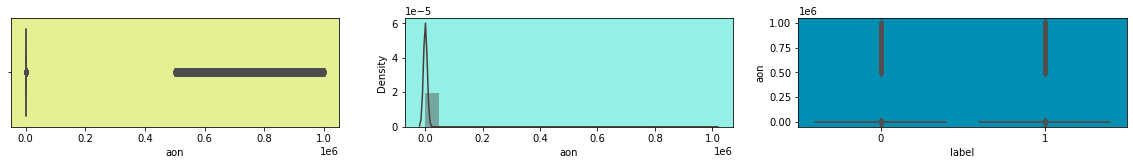

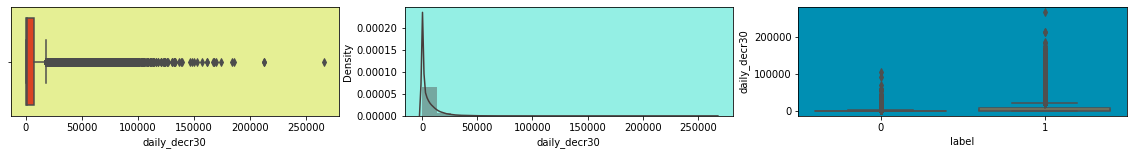

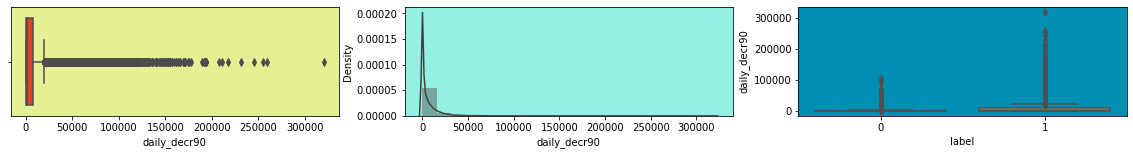

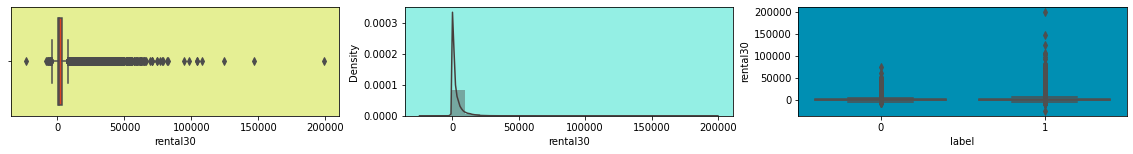

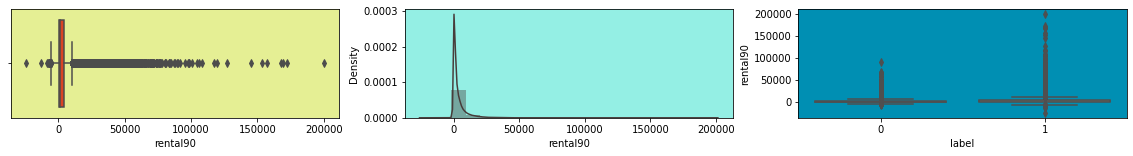

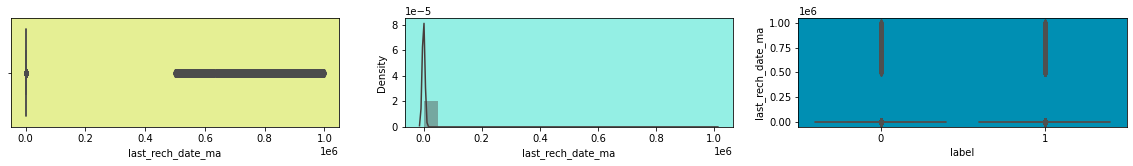

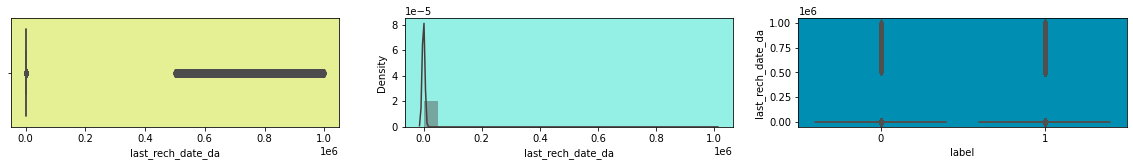

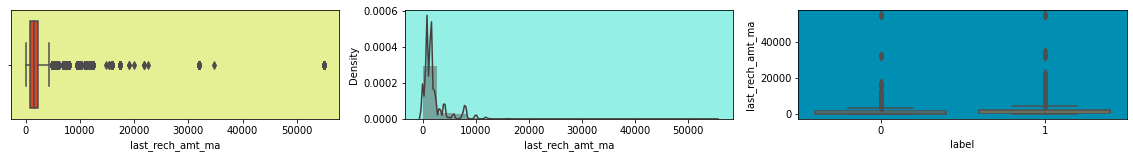

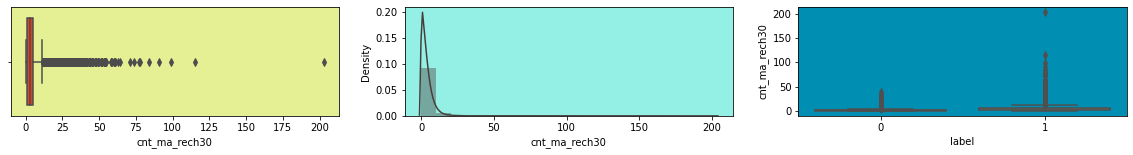

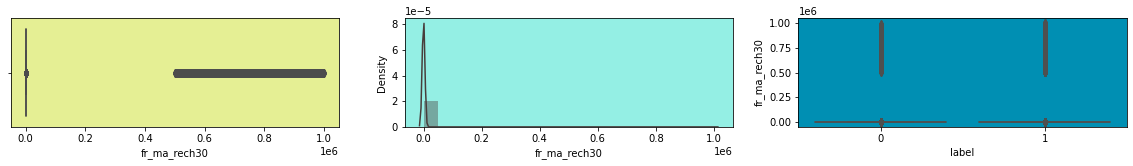

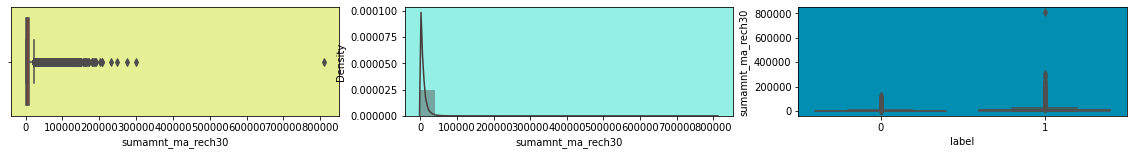

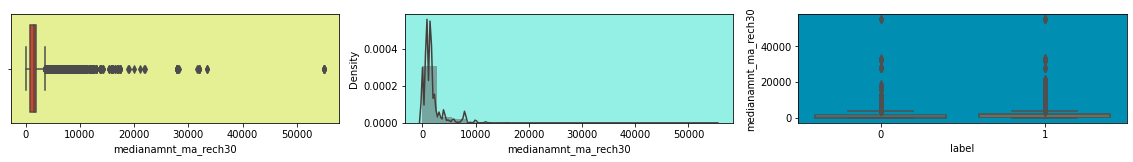

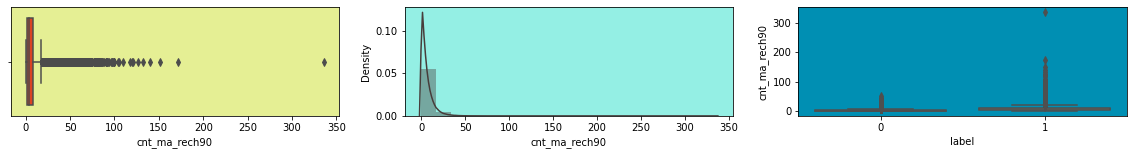

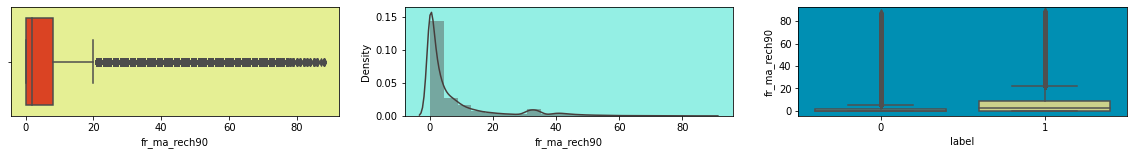

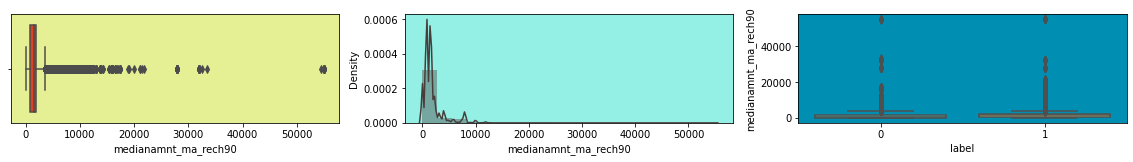

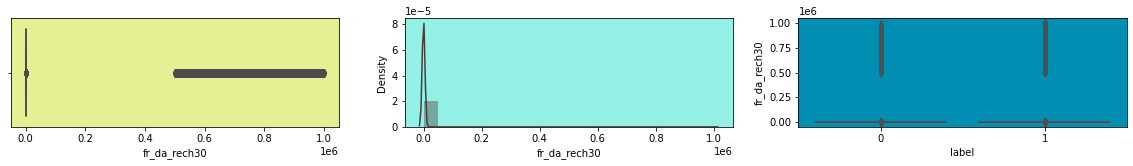

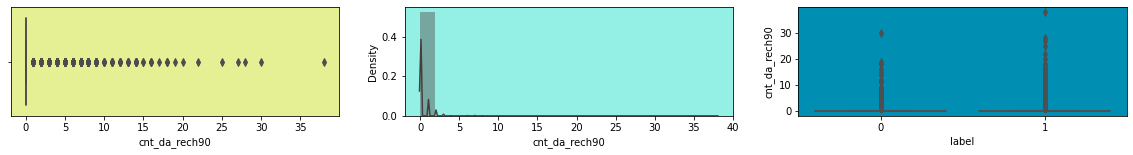

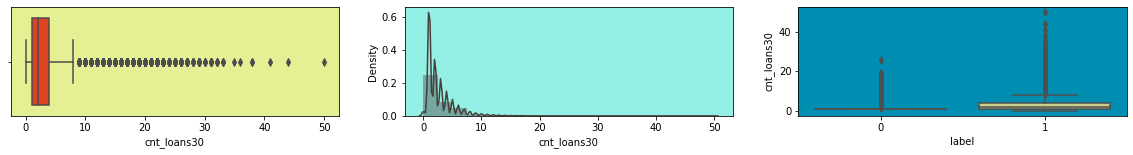

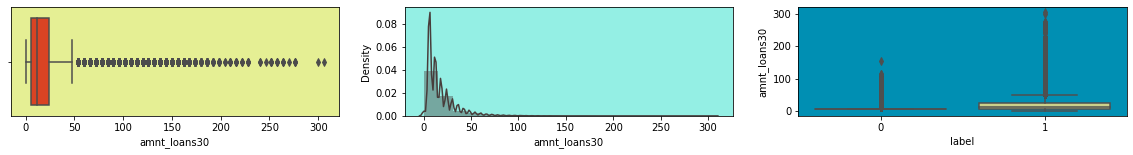

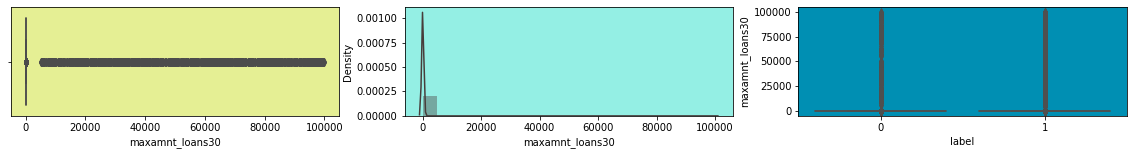

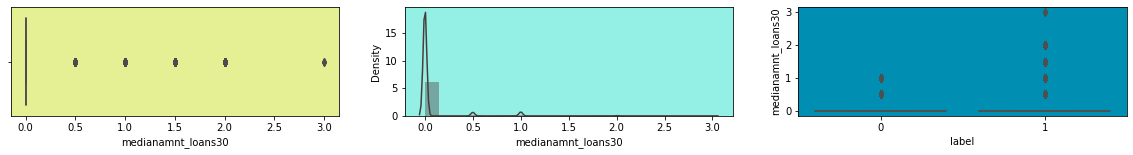

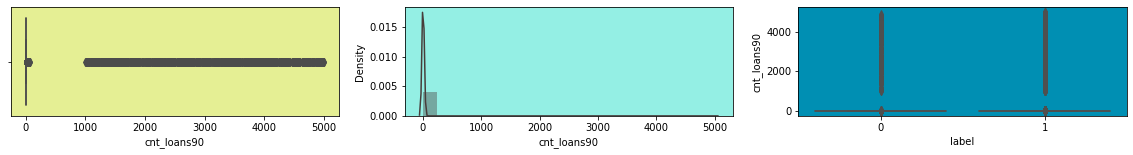

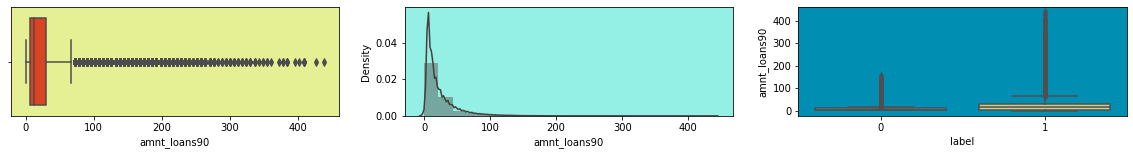

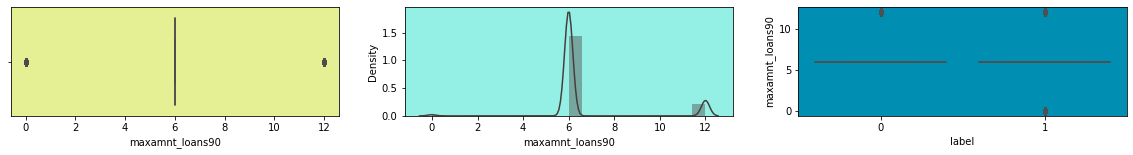

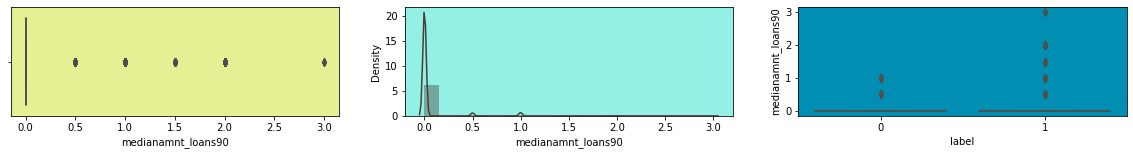

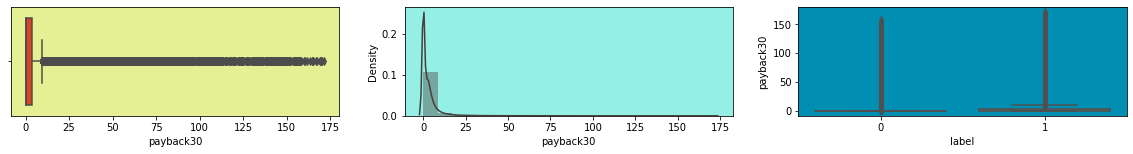

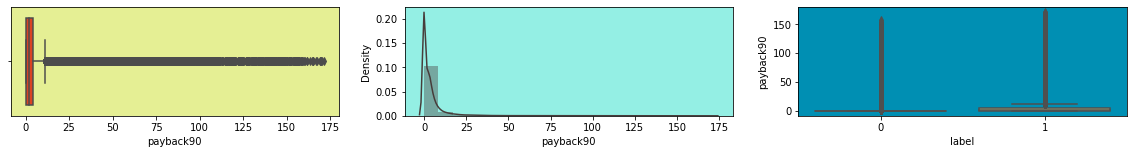

In [ ]:
target_variable = 'label'
feature_variable = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90']


def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 2))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color="#f82f04")
    a1.set_facecolor("#e5ef94")
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color="#473d3b")
    a2.set_facecolor("#94efe4")
    
    a3=sns.boxplot(x = target_variable, y = feature_name, data = df, ax=axs[2], palette = "rainbow")
    a3.set_facecolor("#008fb3")
    plt.show()
    
   
for i in feature_variable:
    num_plots(i)

Key Observations:
1. We can observe the Data have to many outliers and skewness.
2. We can also see that as mentioned above how the Feature variable is contributing for target variable.
3. Lets seprately visualize skewness and outliers  and lets figure out the way to remove them without much loss in data.

Visualizing Skewness


In [ ]:
plt.figure(figsize=(20,20))

for i in range (0, len(collist)):
    plt.subplot(8,4,i+1)         
    sns.kdeplot(df[collist[i]], color = 'b')
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

We can see that the data have too much skewness we will remove them by Power-transformation yoeJohnson method but before which we will visualize outliers and figure out a method to remove them without much loss in data.

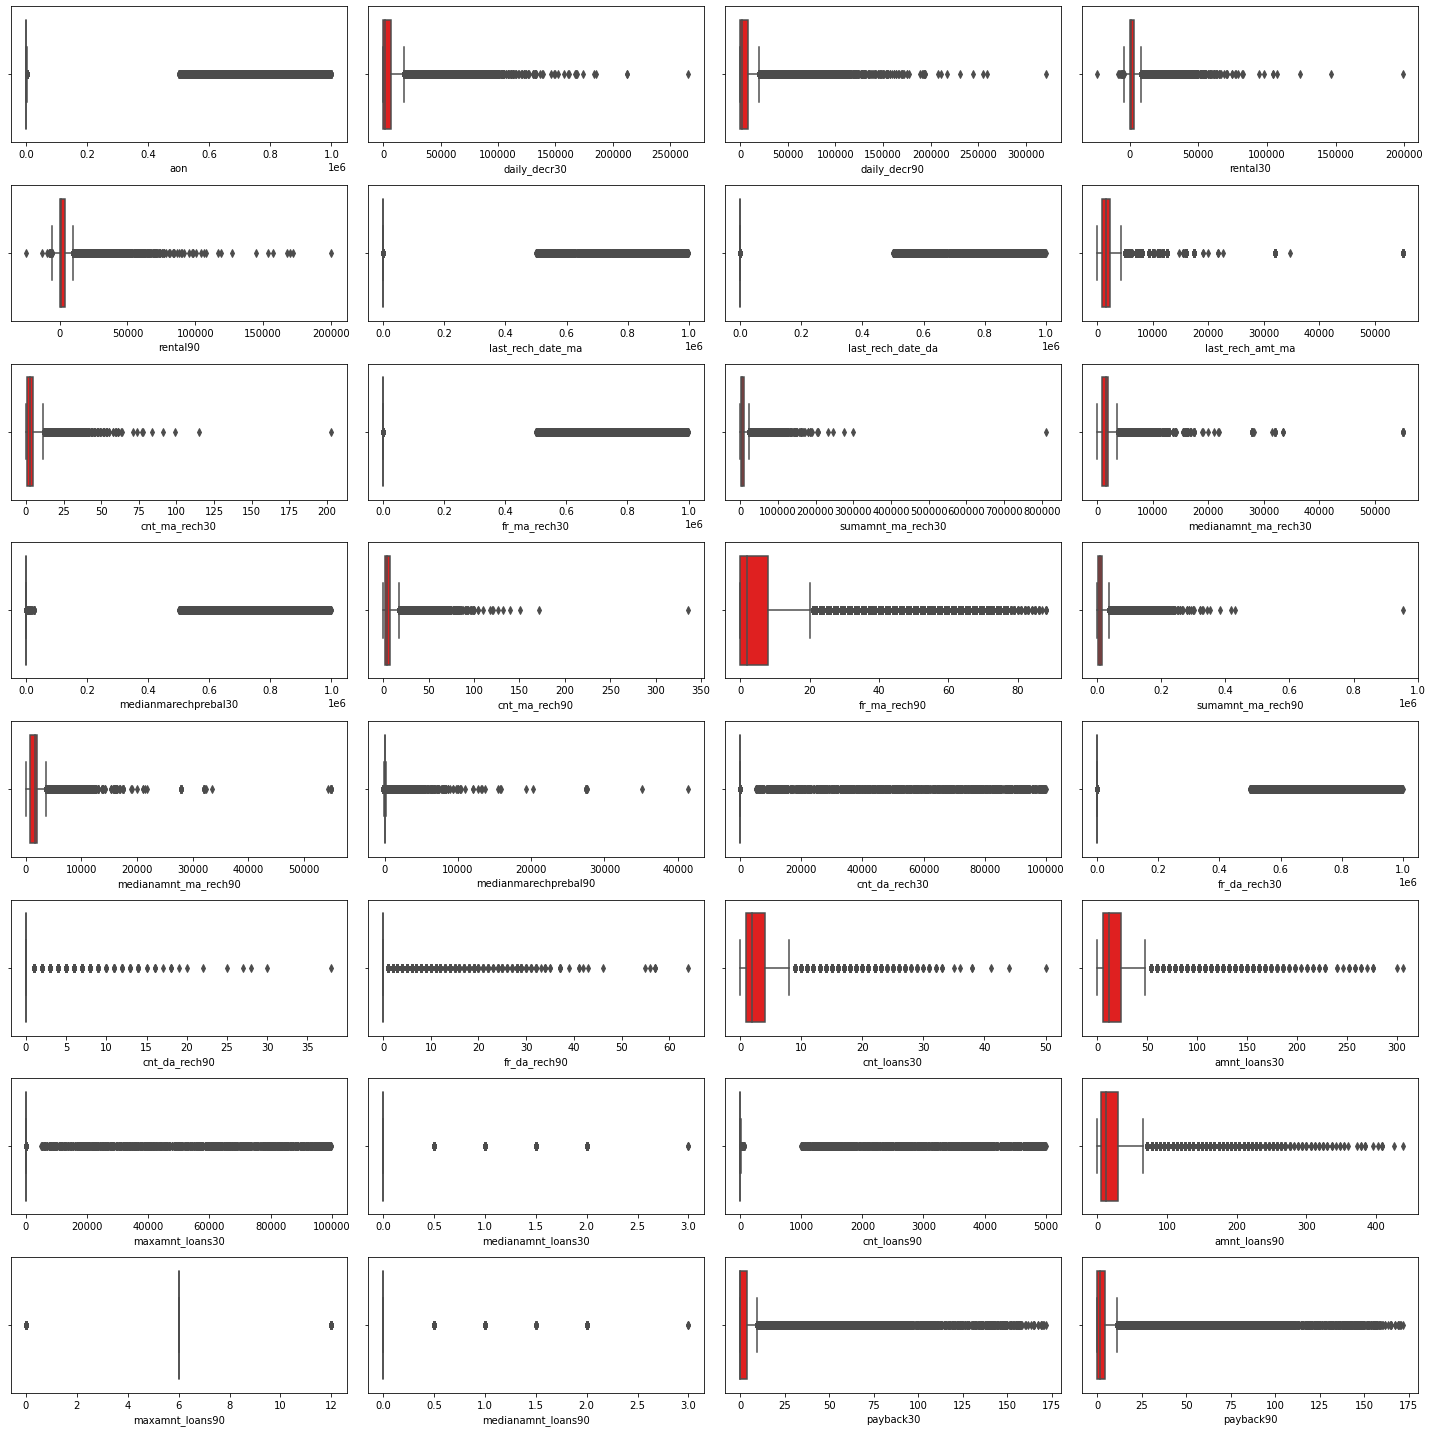

In [ ]:

plt.figure(figsize=(20,20))
for i in range (0, len(collist)):
    plt.subplot(8,4,i+1)
    ax=sns.boxplot(df[collist[i]], color = "red")
    ax.set_facecolor("w")
    plt.tight_layout()

lets try removing outliers by z score method.



In [ ]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold= 3
df_new = df[(z < 3).all(axis=1)]


In [ ]:
print(f"Orginal Data {df.shape}\n After Removing outliers {df_new.shape}\nThe percentage of data loss {((209592-161465)/209592)*100}%")


Orginal Data (209592, 35)
 After Removing outliers (161465, 35)
The percentage of data loss 22.96223138287721%


The loss of data is too high in Z-Score method lets see about other methods for outliers removal.


In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


In [ ]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new1.shape}\nThe percentage of data loss {((209592-56628)/209592)*100}%")


Orginal Data (209592, 35)
After Removing outliers (56628, 35)
The percentage of data loss 72.98179319821368%


Removing Skewness


In [ ]:
x_1=df.drop(["label"], axis = 1)
y_1=df.label


In [ ]:
from sklearn.preprocessing import power_transform
x_1=power_transform(x_1,method="yeo-johnson")
x_1

array([[-0.17711202,  0.33215731,  0.29918259, ...,  1.78398404,
         0.71082238,  0.39752454],
       [ 0.03645225,  1.11601957,  1.04508281, ..., -1.01891435,
        -0.41014406,  1.48012963],
       [-0.03465955, -0.007506  , -0.02820064, ..., -1.01891435,
         0.60997236,  1.48012963],
       ...,
       [ 0.13457591,  1.10045362,  1.03342251, ...,  0.75295343,
         1.54675826,  0.39752454],
       [ 0.30910014,  1.13605548,  1.06837956, ...,  1.3378482 ,
         1.18938807,  0.39752454],
       [ 0.27706161,  0.52502202,  0.48715722, ..., -1.01891435,
        -0.81940564,  0.39752454]])

Shortlisting Best RandomState.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = i,  stratify=y_1 )
    mod = GaussianNB()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = accuracy_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")


Best Accuracy 74.12878354135654 found on randomstate 156


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate, stratify=y_1)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb


Lets shortlist promising Classification models.


In [ ]:
def mod_sco(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(), scores['test_f1'].std()

    
    result = {
        "Accuracy": accuracy,
        "Accuracy std": accuracy_std,
        "Precision": precision,
        "Precision std": precision_std,
        "Recall": recall,
        "Recall std": recall_std,
        "f1": f1,
        "f1 std": f1_std,
    }
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return result


In [ ]:
models = [LogisticRegression(), GaussianNB(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier(silent=True)]

model_names = ["LogisticRegression", "Naive Bayes Gaussian", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting", "XGBoost"]

In [ ]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"............................................................running {model_names[model]}")
    
    clf_scores = mod_sco(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])




Step 1 of 8
............................................................running LogisticRegression
Accuracy: 0.8838823321268283 - (std: 0.0004272677315464321)
Precision: 0.8617917051502962 - (std: 0.0012916715424447075)
Recall: 0.8838823321268283 - (std: 0.0004272677315464321)
f1: 0.8492119167994282 - (std: 0.0012719811595694806)


Step 2 of 8
............................................................running Naive Bayes Gaussian
Accuracy: 0.7392266947578531 - (std: 0.0014475724179458251)
Precision: 0.8714678566104486 - (std: 0.001670494113525385)
Recall: 0.7392266947578531 - (std: 0.0014475724179458251)
f1: 0.7803384223986647 - (std: 0.001138800054091002)


Step 3 of 8
............................................................running Random Forest
Accuracy: 0.9205122280173412 - (std: 0.0008367500028434713)
Precision: 0.9138240706395026 - (std: 0.0010181403098306484)
Recall: 0.9205122280173412 - (std: 0.0008367500028434713)
f1: 0.9128920715520839 - (std: 0.0012061743751336064)


S

In [ ]:
classification_result = pd.DataFrame({"Model": model_names,
                                      "accuracy": accuracy,
                                      "precision": precision,
                                      "recall": recall,
                                      "f1": f1})
classification_result.sort_values(by="f1", ascending=False)


Model  accuracy  precision    recall        f1
2         Random Forest  0.920512   0.913824  0.920512  0.912892
6     Gradient Boosting  0.918699   0.911660  0.918699  0.910102
7               XGBoost  0.916473   0.909196  0.916473  0.906250
5             Ada Boost  0.910054   0.901830  0.910054  0.895978
3         Decision Tree  0.883157   0.885844  0.883157  0.884439
4            Extra Tree  0.873787   0.875459  0.873787  0.874604
0    LogisticRegression  0.883882   0.861792  0.883882  0.849212
1  Naive Bayes Gaussian  0.739227   0.871468  0.739227  0.780338

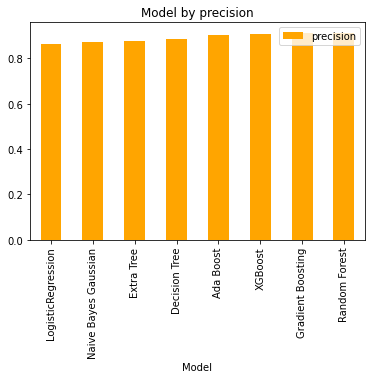

In [ ]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    classification_result.sort_values(by=metric).plot.bar("Model", metric, color = "orange")
    plt.title(f"Model by {metric}")
    plt.show()

Key Observation:

Among our model we have XGB tops the chart. Lets hypertune XGBost. XGB-F1score = 0.917606



In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
clf_xgb =  xgb.XGBClassifier(silent=True)
clf_xgb.fit(x_train,y_train)


XGBClassifier(silent=True)

In [ ]:
y_pred_prob=clf_xgb.predict_proba(x_test)
y_pred_prob

array([[9.3767941e-02, 9.0623206e-01],
       [1.1661649e-03, 9.9883384e-01],
       [7.9351664e-04, 9.9920648e-01],
       ...,
       [1.3861656e-03, 9.9861383e-01],
       [3.3625424e-02, 9.6637458e-01],
       [2.5814623e-01, 7.4185377e-01]], dtype=float32)

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve-XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()


In [ ]:
clf_xgb.get_params()


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1,
 'verbosity': 1}

In [56]:
preds = cross_val_predict(clf_xgb, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])


Predicted     0       1
Real                   
0          8832   10789
1          2341  135232

In [57]:
print(metrics.classification_report(y_train, preds, zero_division=0))


              precision    recall  f1-score   support

           0       0.79      0.45      0.57     19621
           1       0.93      0.98      0.95    137573

    accuracy                           0.92    157194
   macro avg       0.86      0.72      0.76    157194
weighted avg       0.91      0.92      0.91    157194



HYPERPARAMETER TUNING....


In [58]:
param_grid = [
    {'learning_rate' : [1e-3, 1e-1, 'log-uniform'],
     'n_estimators': [100, 500],
     'max_depth': [1, 10],
     'min_child_weight': [1, 6.],
     'gamma': [0, 0.5], 
     'subsample':[0.5, 1.], 
     'colsample_bytree': [0.5, 1.] 
    }
]


clf_xgb =  xgb.XGBClassifier(silent=True)


In [59]:
grid_search = GridSearchCV(clf_xgb, param_grid, cv=3,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)


In [ ]:
grid_search.fit(x_train,y_train)



Fitting 3 folds for each of 192 candidates, totalling 576 fits


In [ ]:
grid_search.best_params_


In [ ]:
grid_search.best_score_


In [ ]:
final_model = grid_search.best_estimator_
preds = cross_val_predict(final_model, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Actual'], colnames =['Predicted'])

In [ ]:
print(metrics.classification_report(y_train, preds))


In [ ]:
y_pred = final_model.predict(x_test)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])


In [ ]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))


In [ ]:
conf_mx = metrics.confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=final_model.classes_,
                 yticklabels=final_model.classes_,
                cmap= "Blues")


In [ ]:
y_pred_prob=final_model.predict_proba(x_test)
y_pred_prob
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve-XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show() 

In [ ]:
mod_sco(final_model, x_train, y_train, cv=5, verbose=True)
scoring = {"accuracy": "accuracy","precision": "precision_weighted",
           "recall": "recall_weighted","f1": "f1_weighted"}
scores = cross_validate(final_model, x_train, y_train, cv=5, scoring=scoring)
accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
f1, f1_std = scores['test_f1'].mean(), scores['test_f1'].std()


In [ ]:
print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
print(f"Precision: {precision} - (std: {precision_std})")
print(f"Recall: {recall} - (std: {recall_std})")
print(f"f1: {f1} - (std: {f1_std})")


Post the hyperparameter tuning our our model f1 - score increased from f1: 0.917606 to f1: 0.91829 with accuracy of 92.36%

Summary:
We started cleansing our data in removing the Duplicate Records. We also figured out that in our data 'pcircle', 'msisdn' two attributes have same values and unique values for all the records so we decided to droped those attributers to make our data predictable. Then we have splited out pdate attributes into day and month we have same year for all the record so we didnt include year.

We visualize the mathematical summary of the data and we saw the correlation of all the data with target variable the top five correlation feature variable are as follows.

                            cnt_ma_rech30   0.237331
                            cnt_ma_rech90   0.236393
                            sumamnt_ma_rech90   0.205794
                            sumamnt_ma_rech30   0.202828
                            amnt_loans90    0.199788

We gained some insights and also identify which variable contributions are more on Defaulter and Non_Defaulter in target variable we also identified outliers and Skewness and using PowerTransformation removed Skewness.

We shortlisted XGBoosting model from 8 different models and we have hypertuned it for increase in performance and we have achived f1-Score: 0.91829 with accuracy of 92.36%

lets Save our model for further use.



In [ ]:
import joblib
joblib.dump(final_model,"M_creditdefaulter_model.obj")


Conclusion:
From our above analysis we understand that which factors are responsible and using which a Microfinance Institution (MFI) can predict that a customer can be a defaulter or not a defaulter basis on which Microfinance Institution (MFI) can give a short term loan and predictions that could help them in further investment and improvement in selection of customers.